# EXPLORATORY DATA ANALYSIS OF THE UK TRAFFIC ACCIDENT IN 2015

DATA PREPARATION

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import datetime

#Setting up the visual configuration
plt.style.use('ggplot') 
plt.rcParams['font.size'] = 12 
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['font.size'] = 10
plt.rcParams['text.color'] = 'black'

In [18]:
uk_accident=pd.read_csv('cleaned_data.csv') #To load the datasets .csv
uk_accident.head()

,Date,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,Local_Authority_(District),...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Month
0,2015-12-01,-0.198465,51.505538,Metropolitan Police,Slight,1,1,Monday,1900-01-01 18:45:00,Kensington and Chelsea,...,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - light lit,Fine no high winds,Dry,None,None,Urban,Yes,December
1,2015-12-01,-0.178838,51.491836,Metropolitan Police,Slight,1,1,Monday,1900-01-01 07:50:00,Kensington and Chelsea,...,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,December
2,2015-12-01,-0.205590,51.514910,Metropolitan Police,Slight,1,1,Monday,1900-01-01 18:08:00,Kensington and Chelsea,...,None within 50 metres,Zebra,Darkness - light lit,Raining no high winds,Wet/Damp,None,None,Urban,Yes,December
3,2015-01-13,-0.208327,51.514952,Metropolitan Police,Slight,1,1,Tuesday,1900-01-01 07:40:00,Kensington and Chelsea,...,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Wet/Damp,None,None,Urban,No,January
4,2015-09-01,-0.206022,51.496572,Metropolitan Police,Serious,2,1,Friday,1900-01-01 07:30:00,Kensington and Chelsea,...,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight,Raining no high winds,Wet/Damp,None,None,Urban,No,September


In [3]:
uk_accident.describe(include='all') #To view the distribution of the parameters in  the dataset

,Date,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,Local_Authority_(District),...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Month
count,140056,140056.000000,140056.000000,140056,140056,140056.000000,140056.000000,140056,140056,140056,...,140056,140056,140056,140056,140056,140056,140056,140056,140056,140056
unique,365,NaN,NaN,51,3,NaN,NaN,7,1439,380,...,3,6,5,9,5,8,6,2,3,12
top,2015-05-11,NaN,NaN,Metropolitan Police,Slight,NaN,NaN,Friday,1900-01-01 17:00:00,Birmingham,...,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,September
freq,535,NaN,NaN,24886,118402,NaN,NaN,22374,1347,2970,...,139339,113601,102608,113949,101551,136926,137843,92080,112615,12396
mean,NaN,-1.330650,52.496821,NaN,NaN,1.841014,1.329390,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,1.393636,1.420999,NaN,NaN,0.710046,0.795427,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,-7.422915,49.915618,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,-2.216163,51.475224,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,-1.236491,52.052044,NaN,NaN,2.000000,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,-0.172530,53.414549,NaN,NaN,2.000000,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# EDA

ANALYSIS WITH THE LEVEL OF SEVERITY

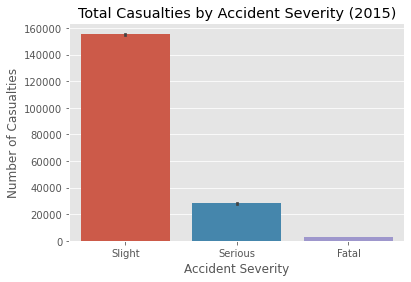

In [4]:
sns.barplot(x='Accident_Severity',y='Number_of_Casualties', data=uk_accident, estimator=np.sum)
plt.title("Total Casualties by Accident Severity (2015)")
plt.ylabel("Number of Casualties")
plt.xlabel("Accident Severity")
plt.show()

It is surprising to see that slight accident severity led to high number of casualties as against a fatal accident severity

ANALYSIS WITH SOME ROAD FEATURES

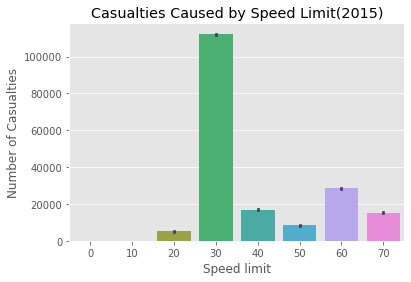

In [5]:
sns.barplot(x='Speed_limit',y='Number_of_Casualties', data=uk_accident, estimator=np.sum)
plt.title("Casualties Caused by Speed Limit(2015)")
plt.ylabel("Number of Casualties")
plt.xlabel("Speed limit")
plt.show()

Low Speed Limit (30 km/hr) of the vehicle resulted in more casualties as against the vehicle on high speed

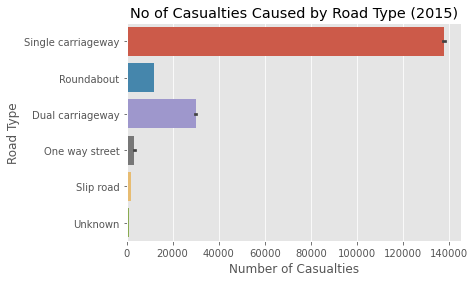

In [6]:
sns.barplot(x='Number_of_Casualties',y='Road_Type', data=uk_accident, estimator=np.sum)
plt.title("No of Casualties Caused by Road Type (2015)")
plt.ylabel("Road Type")
plt.xlabel("Number of Casualties")
plt.show()

A Single carriageway which could be a two-lane highway but with no barricade from vehicles coming in the opposite direction. It was observed that most of the accident occurred as a result of the single carriageway which would been an head-on collision with the vehicle coming in the opposite direction

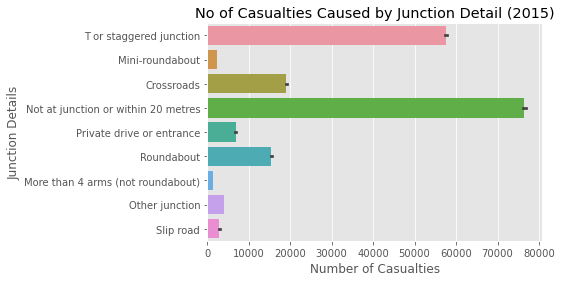

In [7]:
sns.barplot(x='Number_of_Casualties',y='Junction_Detail', data=uk_accident, estimator=np.sum)
plt.title("No of Casualties Caused by Junction Detail (2015)")
plt.ylabel("Junction Details")
plt.xlabel("Number of Casualties")
plt.show()

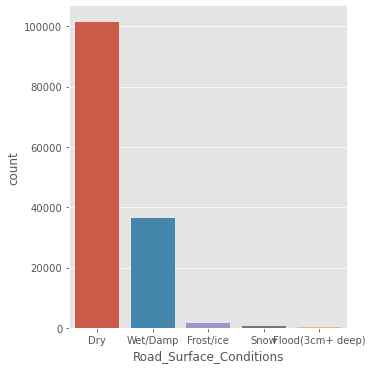

In [8]:
sns.catplot(x='Road_Surface_Conditions', data=uk_accident, kind='count')
plt.show()

ANALYSIS WITH WEATHER CONDITIONS

<AxesSubplot:xlabel='Accident_Severity', ylabel='count'>

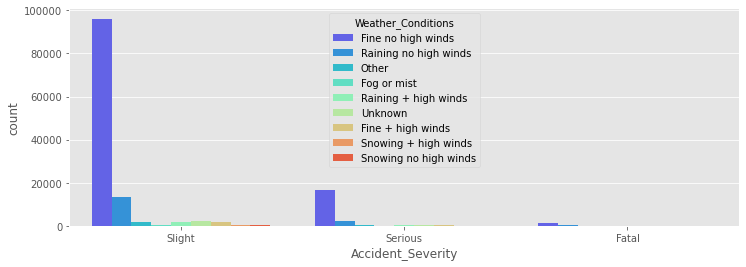

In [9]:
plt.figure(figsize=(12,4))
sns.countplot(x='Accident_Severity',data=uk_accident,hue='Weather_Conditions',palette='rainbow')

More accidents occurred in a "fine no high wind" condition possibly as a result of full confidence of a good weather condition and motorists were less careful 

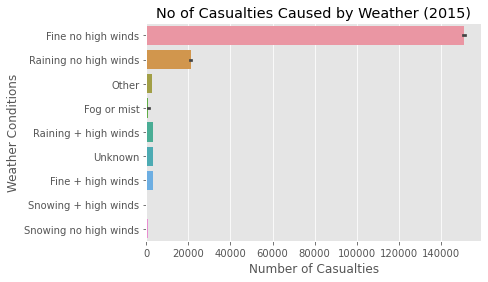

In [10]:
sns.barplot(x='Number_of_Casualties',y='Weather_Conditions', data=uk_accident, estimator=np.sum)
plt.title("No of Casualties Caused by Weather (2015)")
plt.ylabel("Weather Conditions")
plt.xlabel("Number of Casualties")
plt.show()

ANALYSIS WITH THE AREA (I.E. URBAN OR RURAL)

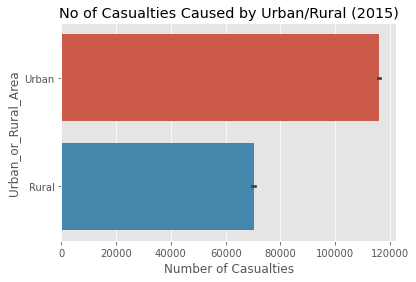

In [11]:
sns.barplot(x='Number_of_Casualties',y='Urban_or_Rural_Area', data=uk_accident, estimator=np.sum)
plt.title("No of Casualties Caused by Urban/Rural (2015)")
plt.ylabel("Urban_or_Rural_Area")
plt.xlabel("Number of Casualties")
plt.show()

Accident in UK at year 2015 happened more in Urban Area than in the Rural Area

ANALYSIS WITH VEHICLES

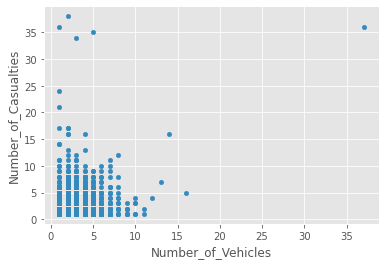

In [12]:
uk_accident.plot.scatter(x="Number_of_Vehicles", y="Number_of_Casualties")
plt.show()

High rate of casualties occurred between two vehicles. Therefore, the casualties most have resulted in collision 

ANALYSIS WITH POLICE OFFICER ATTENDING THE ACCIDENT SCENE

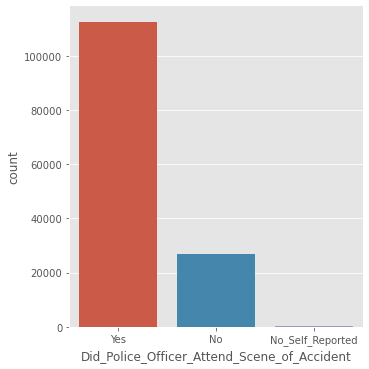

In [13]:
sns.catplot(x='Did_Police_Officer_Attend_Scene_of_Accident', data=uk_accident, kind='count')
plt.show()

It is seen that for most accident that happened in UK (2015), police officer visited the scene more. This denote an activeness to rescue by the police force in the UK

# To perform a HEATMAP PLOT on the dataset

In [14]:
uk_accident=pd.read_csv('cleaned_data.csv', usecols=["Day_of_Week","Time"])
uk_accident.dropna(inplace=True)
uk_accident.head()

,Day_of_Week,Time
0,Monday,1900-01-01 18:45:00
1,Monday,1900-01-01 07:50:00
2,Monday,1900-01-01 18:08:00
3,Tuesday,1900-01-01 07:40:00
4,Friday,1900-01-01 07:30:00


In [15]:
uk_accident['Time']=uk_accident['Time'].map(lambda x:str(x)[:-6])
uk_accident.head()

,Day_of_Week,Time
0,Monday,1900-01-01 18
1,Monday,1900-01-01 07
2,Monday,1900-01-01 18
3,Tuesday,1900-01-01 07
4,Friday,1900-01-01 07


In [16]:
uk_accident_pivot=pd.crosstab(uk_accident["Day_of_Week"], uk_accident["Time"])
uk_accident_pivot

Time,1900-01-01 00,1900-01-01 01,1900-01-01 02,1900-01-01 03,1900-01-01 04,1900-01-01 05,1900-01-01 06,1900-01-01 07,1900-01-01 08,1900-01-01 09,...,1900-01-01 14,1900-01-01 15,1900-01-01 16,1900-01-01 17,1900-01-01 18,1900-01-01 19,1900-01-01 20,1900-01-01 21,1900-01-01 22,1900-01-01 23
Day_of_Week,,,,,,,,,,,,,,,,,,,,,
Friday,216,157,114,79,73,172,426,1004,1667,1025,...,1421,1936,1908,2022,1568,1202,887,695,646,540
Monday,212,138,73,77,79,175,438,1096,1726,1031,...,1199,1632,1778,1902,1429,992,714,509,414,277
Saturday,432,357,326,240,182,189,222,348,514,771,...,1272,1213,1180,1250,1185,980,700,632,641,575
Sunday,517,418,334,290,224,195,229,293,331,522,...,1117,1095,1122,1087,907,731,651,522,409,302
Thursday,213,142,102,105,90,152,449,1243,1928,1050,...,1206,1671,1890,2113,1691,1194,804,564,504,366
Tuesday,194,110,76,61,57,176,459,1240,1993,1204,...,1128,1675,1840,2222,1613,1135,757,556,467,292
Wednesday,158,108,60,67,64,180,529,1307,2096,1185,...,1169,1619,1880,2137,1513,1106,718,559,461,311


In [41]:
uk_accident_pivot=uk_accident_pivot.reindex(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
uk_accident_pivot

Time,00,01,02,03,04,05,06,07,08,09,...,14,15,16,17,18,19,20,21,22,23
Day_of_Week,,,,,,,,,,,,,,,,,,,,,
Monday,212,138,73,77,79,175,438,1096,1726,1031,...,1199,1632,1778,1902,1429,992,714,509,414,277
Tuesday,194,110,76,61,57,176,459,1240,1993,1204,...,1128,1675,1840,2222,1613,1135,757,556,467,292
Wednesday,158,108,60,67,64,180,529,1307,2096,1185,...,1169,1619,1880,2137,1513,1106,718,559,461,311
Thursday,213,142,102,105,90,152,449,1243,1928,1050,...,1206,1671,1890,2113,1691,1194,804,564,504,366
Friday,216,157,114,79,73,172,426,1004,1667,1025,...,1421,1936,1908,2022,1568,1202,887,695,646,540
Saturday,432,357,326,240,182,189,222,348,514,771,...,1272,1213,1180,1250,1185,980,700,632,641,575
Sunday,517,418,334,290,224,195,229,293,331,522,...,1117,1095,1122,1087,907,731,651,522,409,302


In [21]:
uk_accident.head()

,Date,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,Local_Authority_(District),...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Month
0,2015-12-01,-0.198465,51.505538,Metropolitan Police,Slight,1,1,Monday,1900-01-01 18:45:00,Kensington and Chelsea,...,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - light lit,Fine no high winds,Dry,None,None,Urban,Yes,December
1,2015-12-01,-0.178838,51.491836,Metropolitan Police,Slight,1,1,Monday,1900-01-01 07:50:00,Kensington and Chelsea,...,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,December
2,2015-12-01,-0.205590,51.514910,Metropolitan Police,Slight,1,1,Monday,1900-01-01 18:08:00,Kensington and Chelsea,...,None within 50 metres,Zebra,Darkness - light lit,Raining no high winds,Wet/Damp,None,None,Urban,Yes,December
3,2015-01-13,-0.208327,51.514952,Metropolitan Police,Slight,1,1,Tuesday,1900-01-01 07:40:00,Kensington and Chelsea,...,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Wet/Damp,None,None,Urban,No,January
4,2015-09-01,-0.206022,51.496572,Metropolitan Police,Serious,2,1,Friday,1900-01-01 07:30:00,Kensington and Chelsea,...,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight,Raining no high winds,Wet/Damp,None,None,Urban,No,September


In [ ]:
uk_accident_pivot=pd.crosstab(uk_accident["Day_of_Week"], uk_accident["Time"])
uk_accident_pivot

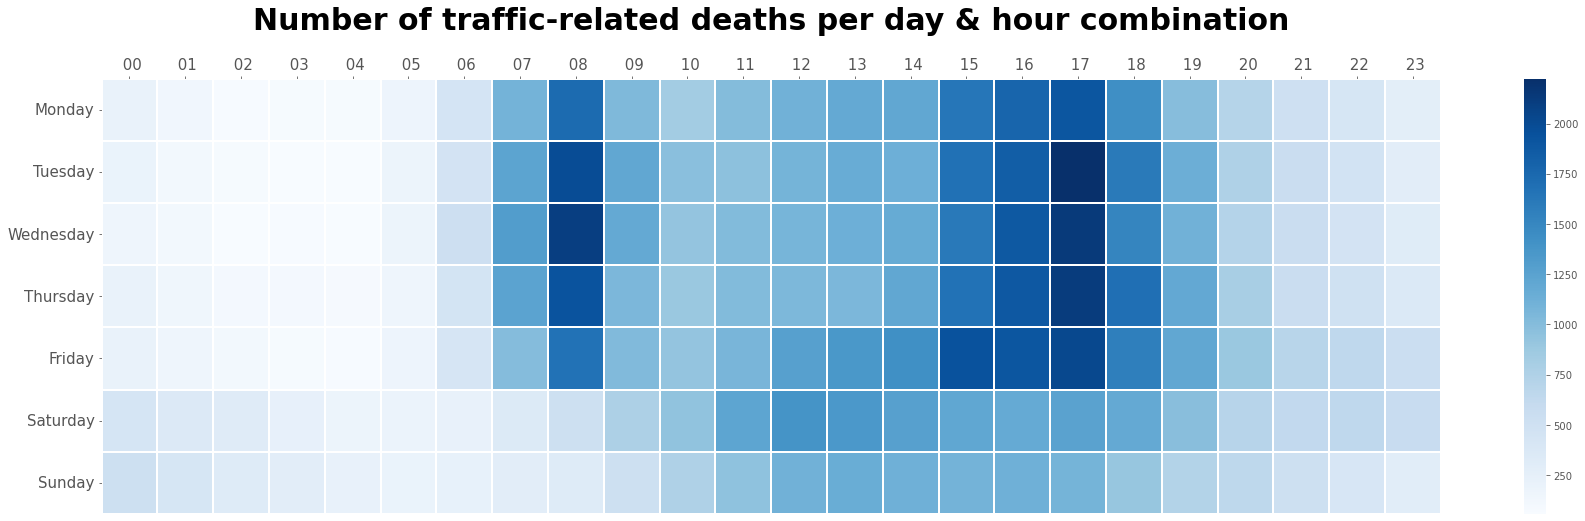

In [50]:
fig, ax = plt.subplots(figsize=(30,8))
graph = sns.heatmap(uk_accident_pivot, cmap="Blues", linecolor="white", linewidths=0.1)

ax.set_title("Number of traffic-related deaths per day & hour combination", y=1.1, fontsize=30, fontweight="bold")
ax.set_xlabel("")
ax.set_ylabel("")

from matplotlib import rcParams
#rcParams['axes.titlepad'] = 130 # Space between the title and graph

locs, labels = plt.yticks() # Rotating row labels
plt.setp(labels, rotation=0) # Rotating row labels

ax.xaxis.tick_top() # x axis on top
ax.xaxis.set_label_position('top') # x axis on top

graph.tick_params(axis='both',labelsize=15) # Tick label size graph

More accident happened on Tuesday than any other day of the week in the year 2015 (UK). 

ANALYSIS WITH LIGHT CONDITION

## Summary

Majority of the accideents occured on single carriageways, without any physical crossing facilities within 50 meters and in day light, when there were no high winds and the roads were dry. So most natural factors weren't the causes of majority of this accidents but instead we can say that the single carriage ways had a huge part to play